# Proyek Analisis Data: Nama dataset
- Nama:Muhammad Athif Falah
- Email:athiffalah@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana tren bulanan PM2.5 di setiap station
- pertanyaan 2 : Bagaimana tren curah hujan bulanan di setiap station

## Menyaipkan semua library yang dibuthkan

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Wrangling

### Gathering Data

In [296]:
# Load semua data kualitas udara dari semua wilayah
pattern = 'PRSA_Data_*.csv'  # Pola ini akan mencocokkan semua file yang dimulai dengan "PRSA_Data_"

# Buat daftar semua file yang cocok dengan pola
file_list = glob.glob(pattern)

# Buat data frame kosong untuk menyimpan data dari file-file CSV
combined_df = pd.DataFrame()

# Loop melalui setiap file CSV dan muat ke dalam data frame
for file in file_list:
    df = pd.read_csv(file)
    combined_df = combined_df.append(df, ignore_index=True)

# Sekarang, combined_df berisi data dari semua file CSV yang telah dimuat
combined_df.head()

/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/1570182892.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/1570182892.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/1570182892.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/1570182892.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [297]:
data_stasiun = {}

# Loop melalui nama-nama stasiun unik dalam kolom 'station'
for nama_stasiun in combined_df['station'].unique():
    # Filter DataFrame untuk nama stasiun saat ini
    df_stasiun = combined_df.loc[combined_df['station'] == nama_stasiun].copy()
    
    # Simpan DataFrame dalam kamus dengan nama stasiun sebagai kunci
    data_stasiun[nama_stasiun] = df_stasiun
    
    


In [298]:
data_stasiun['Wanshouxigong'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 280512 to 315575
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


### Assessing Data

In [299]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [300]:
combined_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [301]:
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

In [308]:
print("Jumlah duplikasi: ",combined_df.duplicated().sum())
combined_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,402286.000000,410108.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,72.455306,100.269668,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,65.197265,80.920853,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,53.000000,81.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,105.000000,143.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,300.000000,420.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [306]:
#mengisi null pada PM2.5

#mengganti nilai PM2.5 yang lebih dari 300 menjadi null ambil penilaian pm2.5 dari website bmkg
combined_df.loc[combined_df['PM2.5'] > 300, 'PM2.5'] = np.nan
#mengganti nilai PM10 yang lebih dari 420 menjadi null ambil penilaian pm10 dari website bmkg
combined_df.loc[combined_df['PM10'] > 420, 'PM10'] = np.nan


In [310]:
combined_df.isna().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10        10660
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

In [309]:
#mengisi null
median_pm25 = combined_df['PM2.5'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['PM2.5'].fillna(median_pm25, inplace=True)


In [311]:
median_pm10 = combined_df['PM10'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['PM10'].fillna(median_pm10, inplace=True)

In [312]:
median_so2 = combined_df['SO2'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['SO2'].fillna(median_so2, inplace=True)

In [313]:
median_no2 = combined_df['NO2'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['NO2'].fillna(median_no2, inplace=True)

In [314]:
median_co = combined_df['CO'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['CO'].fillna(median_co, inplace=True)

In [315]:
median_o3 = combined_df['O3'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['O3'].fillna(median_o3, inplace=True)

In [316]:
median_temp = combined_df['TEMP'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['TEMP'].fillna(median_temp, inplace=True)

In [317]:
median_pres = combined_df['PRES'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['PRES'].fillna(median_pres, inplace=True)

In [318]:
median_dewp = combined_df['DEWP'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['DEWP'].fillna(median_dewp, inplace=True)

In [319]:
median_rain = combined_df['RAIN'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['RAIN'].fillna(median_rain, inplace=True)

In [320]:
median_wspm = combined_df['WSPM'].median()  # Gantilah 'df' dengan nama DataFrame Anda
combined_df['WSPM'].fillna(median_wspm, inplace=True)

In [321]:
combined_df['wd'].fillna('Tidak Tersedia', inplace=True)


## Exploratory Data Analysis (EDA)

In [322]:
combined_df.describe(include="all")

/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/1323309258.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  combined_df.describe(include="all")


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,12,35064
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Gucheng,2013-03-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,12
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 23:00:00
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.600743,99.781478,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,NaN,1.729461,NaN,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,63.873857,79.946590,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,NaN,1.245947,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,NaN


In [323]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,18.0,5.0,43.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,43.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,7.0,43.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,43.0,900.0,45.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,43.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


### Explore ...

In [324]:
#pergerakan rata2 perhari disetiap stasiun
combined_df.groupby(by=["station", "month","day"]).agg({
    "PM2.5": "mean",
    "PM10": "mean"
})

PM2.5        PM10
station       month day                        
Aotizhongxin  1     1     73.354167  124.156250
                    2    122.697917  159.708333
                    3    139.739583  183.302083
                    4    104.989583  166.677083
                    5    107.333333  137.312500
...                             ...         ...
Wanshouxigong 12    27    64.125000   86.822917
                    28    83.947917  115.677083
                    29   105.854167  167.614583
                    30    53.135417  118.385417
                    31    44.510417  123.947917

[4392 rows x 2 columns]

In [325]:
#korelasi antara PM10 dengan PM2.5
correlation_pearson = combined_df['PM10'].corr(combined_df['PM2.5'], method='pearson')
print(correlation_pearson)



0.781338499226439


In [326]:
combined_df.corr()

/var/folders/fh/zy8cggt97yq16p3grzkh874m0000gn/T/ipykernel_43060/2236743958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.061140,-0.070543,-0.223036,-0.044587,0.029085,-0.048520,-0.122268,0.188140,-0.101874,0.004814,0.054066
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.122997e-15,-0.059556,-0.063810,-0.167170,-0.054471,0.018688,-0.022201,-0.151590,0.186488,-0.164644,0.000900,0.087259
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,-1.900932e-16,-0.001941,-0.024084,-0.211870,0.042492,0.040615,-0.103085,0.131137,-0.012756,0.265510,0.016122,-0.139378
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,1.035149e-17,0.000777,0.024819,-0.006055,0.009352,-0.016005,0.002763,0.014418,0.021737,0.023079,-0.003728,-0.011735
hour,0.000684,-2.122997e-15,-1.900932e-16,1.035149e-17,1.000000e+00,0.004677,0.056353,0.030476,-0.001038,-0.029692,0.278786,0.141926,-0.038352,-0.012210,0.012372,0.140417
PM2.5,-0.061140,-5.955649e-02,-1.941462e-03,7.769521e-04,4.677096e-03,1.000000,0.781338,0.442808,0.552650,0.589030,-0.104674,-0.061085,-0.029342,0.169072,-0.010984,-0.273722
PM10,-0.070543,-6.381041e-02,-2.408400e-02,2.481895e-02,5.635338e-02,0.781338,1.000000,0.462035,0.626555,0.618912,-0.093823,-0.060345,-0.041209,0.106421,-0.027079,-0.208822
SO2,-0.223036,-1.671700e-01,-2.118703e-01,-6.055430e-03,3.047638e-02,0.442808,0.462035,1.000000,0.491557,0.523455,-0.161700,-0.318509,0.220741,-0.264385,-0.039852,-0.107337
NO2,-0.044587,-5.447055e-02,4.249225e-02,9.352158e-03,-1.037764e-03,0.552650,0.626555,0.491557,1.000000,0.687864,-0.463401,-0.273557,0.171171,-0.030747,-0.043241,-0.393955
CO,0.029085,1.868769e-02,4.061453e-02,-1.600530e-02,-2.969175e-02,0.589030,0.618912,0.523455,0.687864,1.000000,-0.303764,-0.318067,0.184148,-0.056701,-0.012842,-0.288682


In [327]:
def get_pm25_status(pm25_value):
    if pm25_value >= 0 and pm25_value <= 16:
        return 'Baik'
    elif pm25_value <= 56.1:
        return 'Sedang'
    elif pm25_value <= 151.1:
        return 'Tidak Sehat'
    elif pm25_value <= 251.1:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

combined_df['Status_PM25'] = combined_df['PM2.5'].apply(get_pm25_status)

In [328]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Status_PM25
0,1,2013,3,1,0,6.0,18.0,5.0,43.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00,Baik
1,2,2013,3,1,1,6.0,15.0,5.0,43.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00,Baik
2,3,2013,3,1,2,5.0,18.0,7.0,43.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00,Baik
3,4,2013,3,1,3,6.0,20.0,6.0,43.0,900.0,45.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00,Baik
4,5,2013,3,1,4,5.0,17.0,5.0,43.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00,Baik


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren bulanan PM2.5 di setiap station

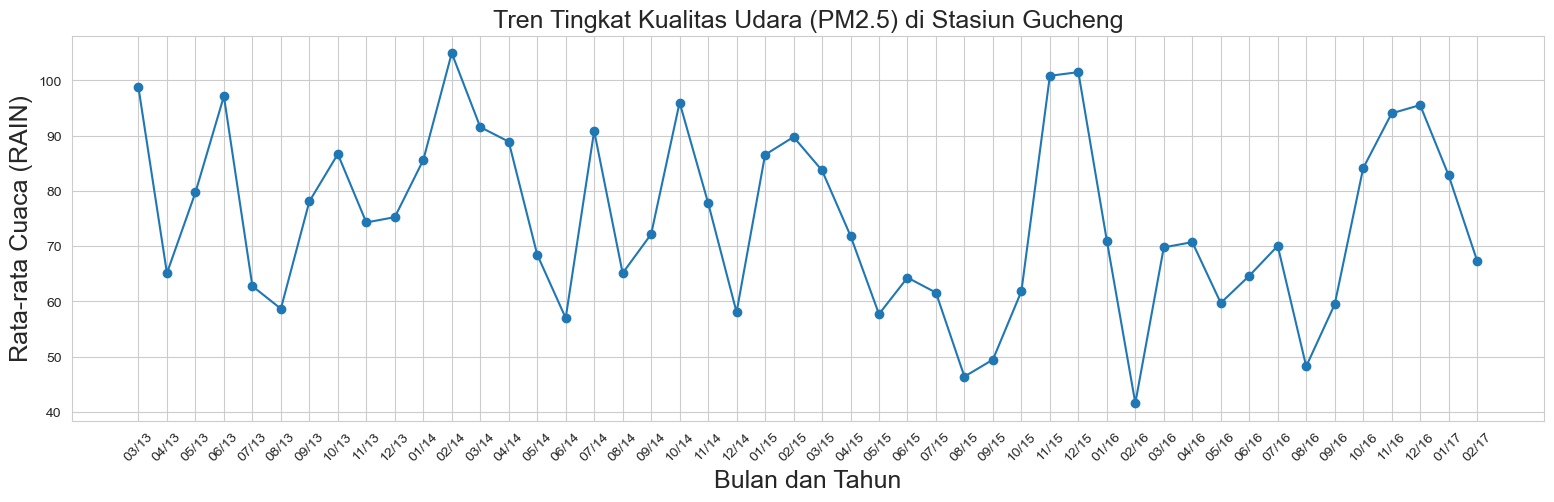

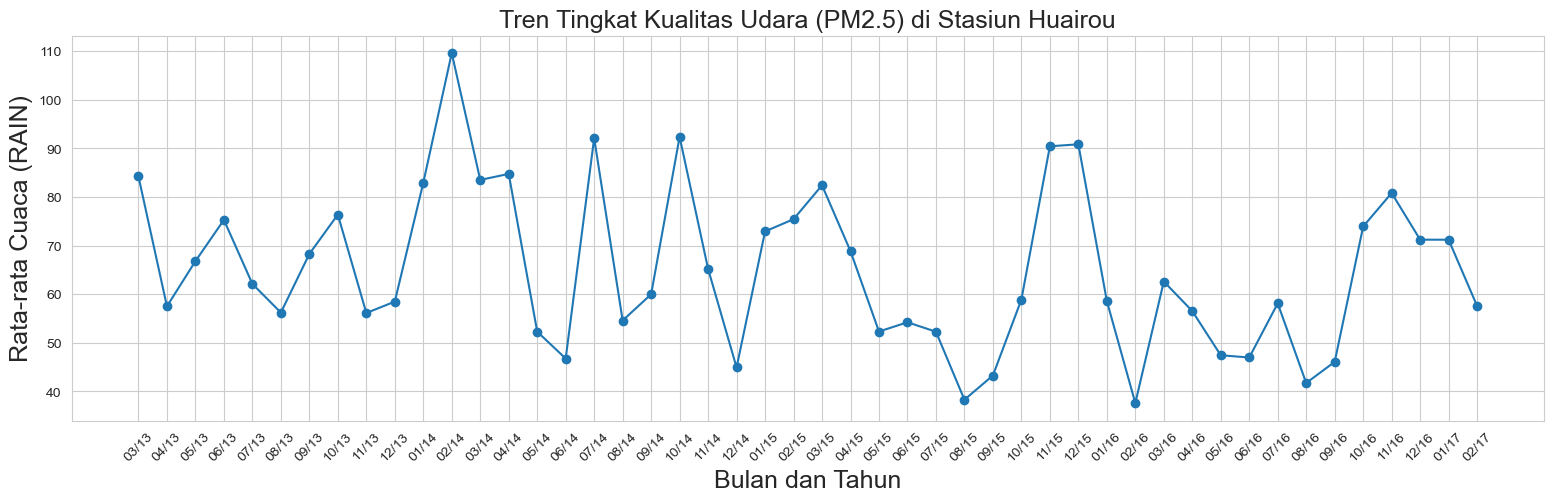

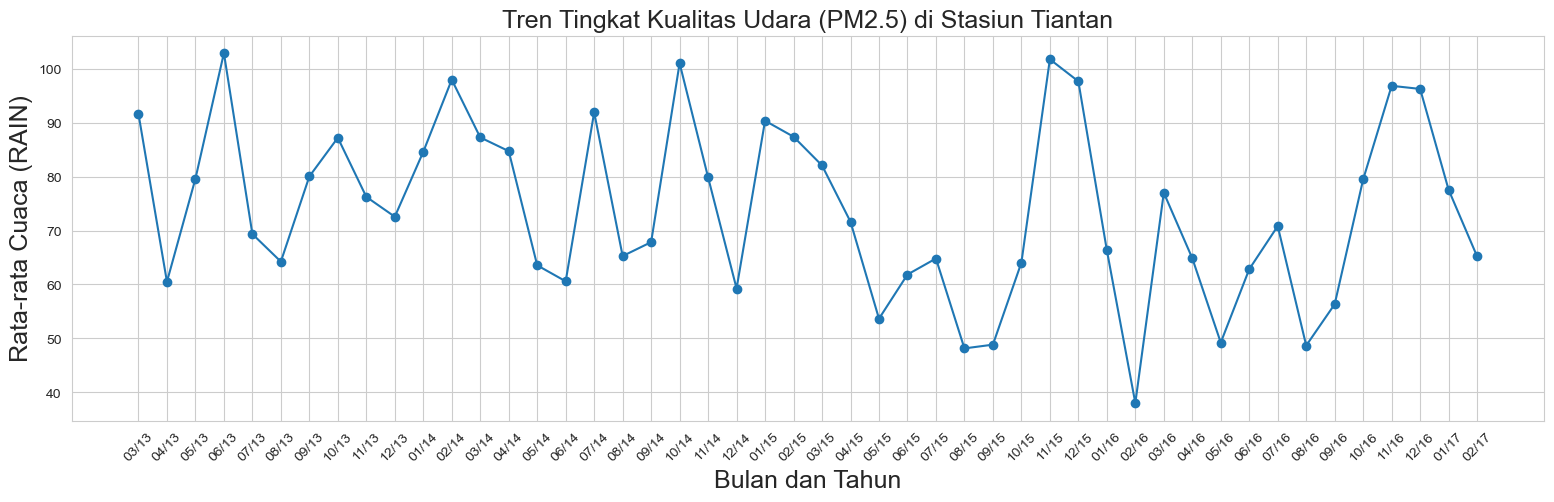

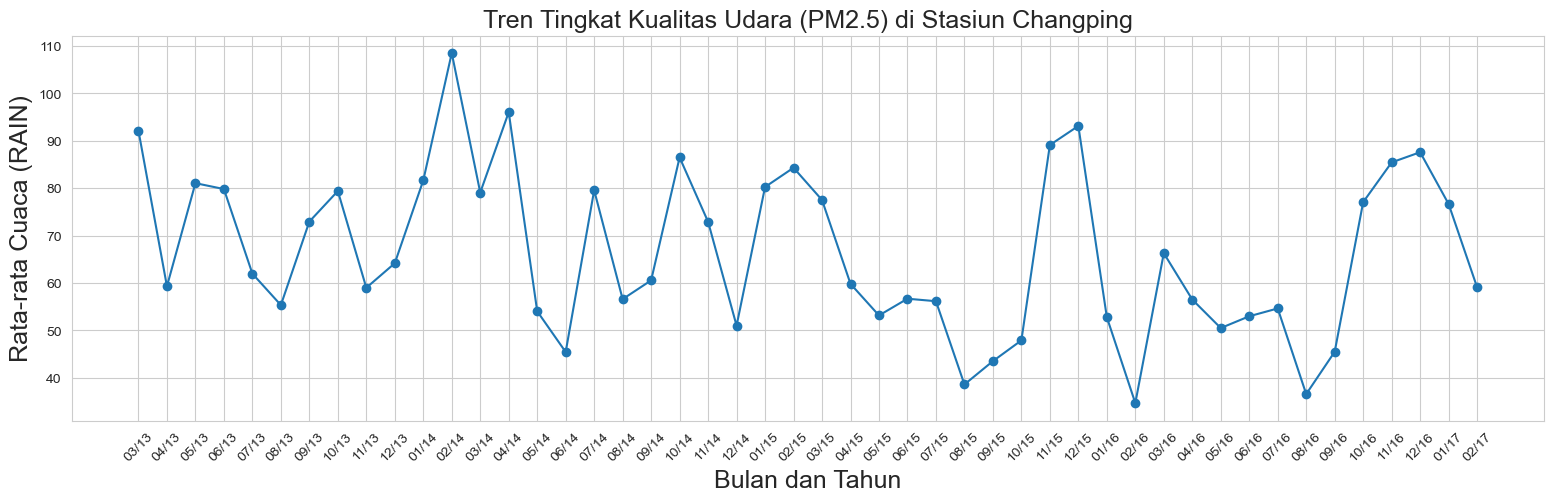

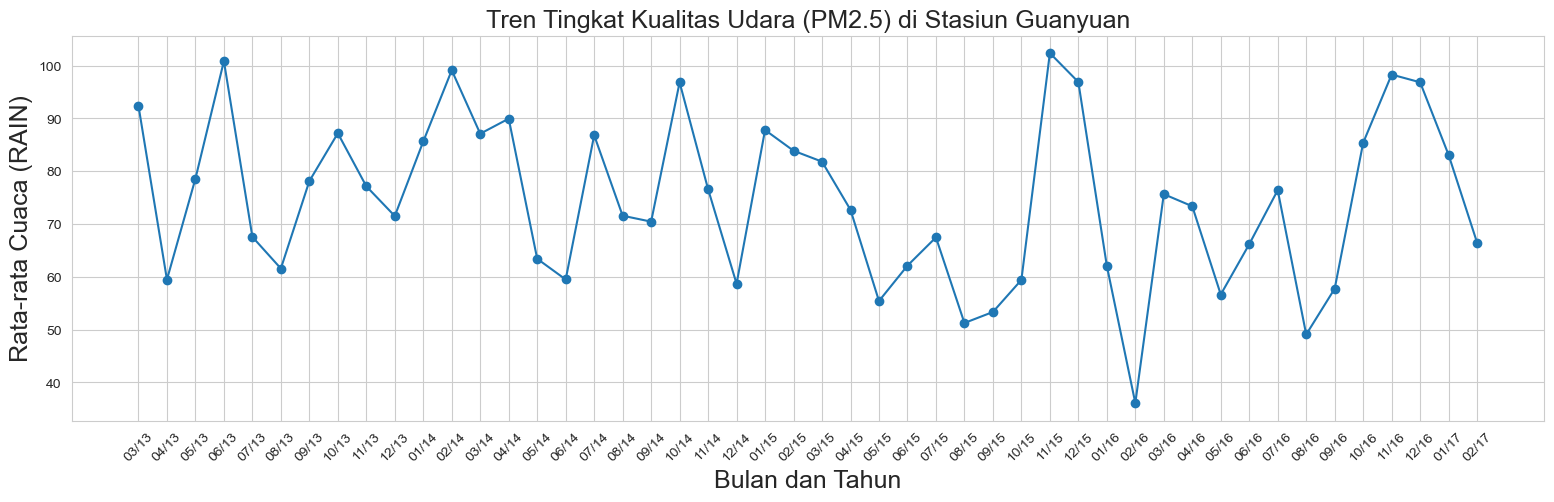

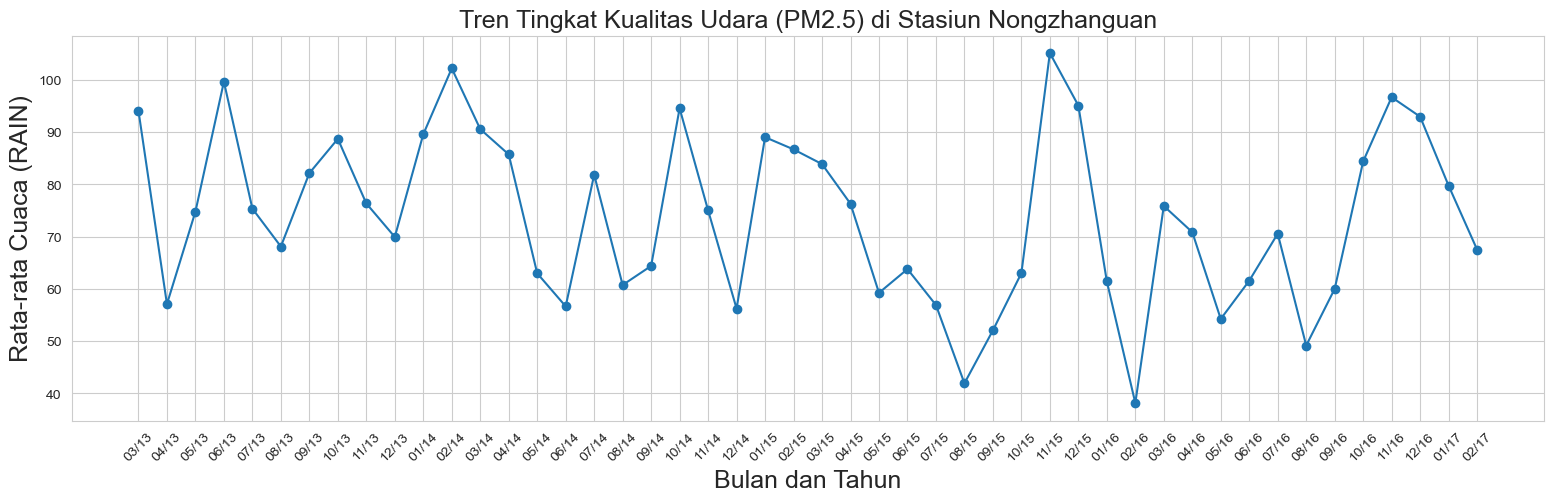

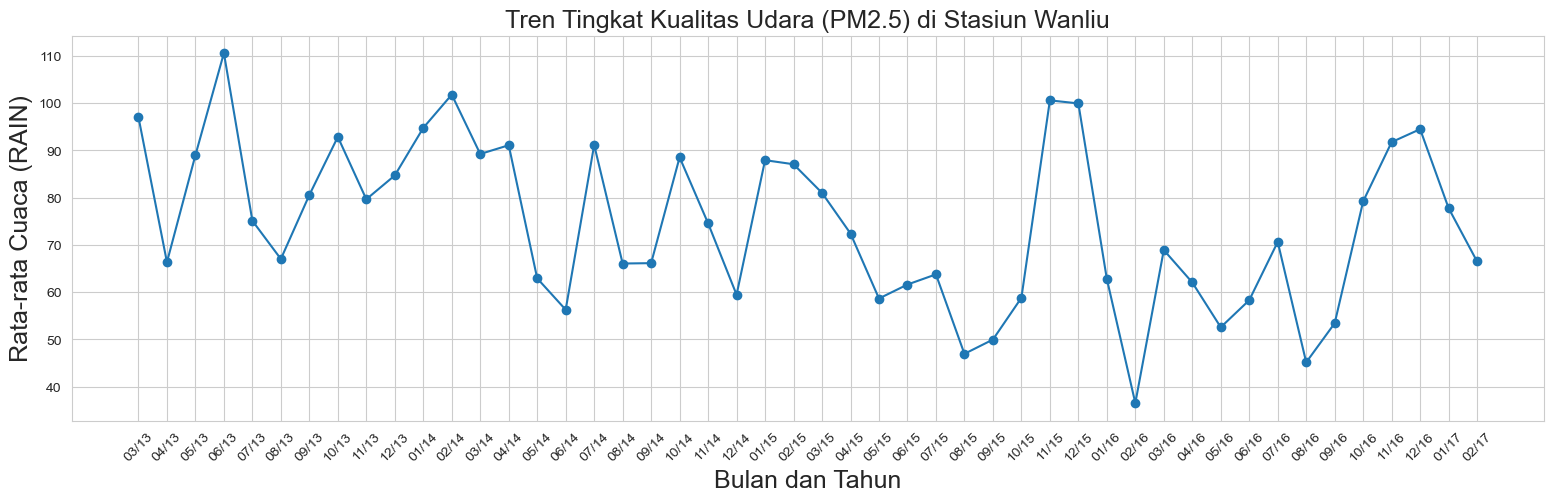

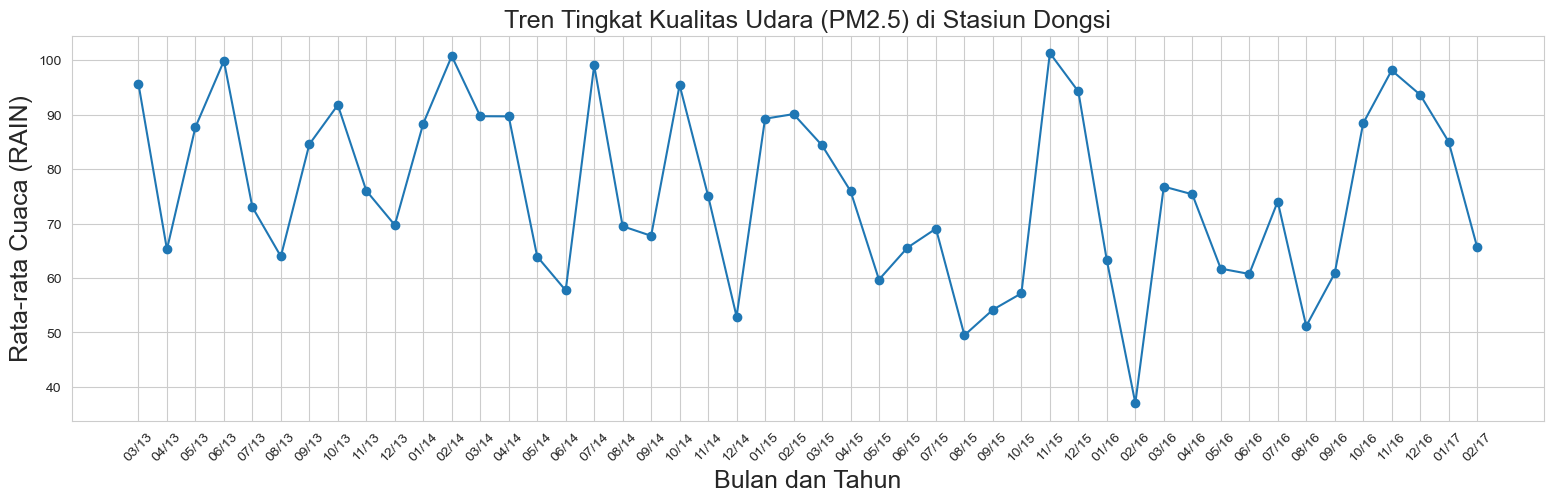

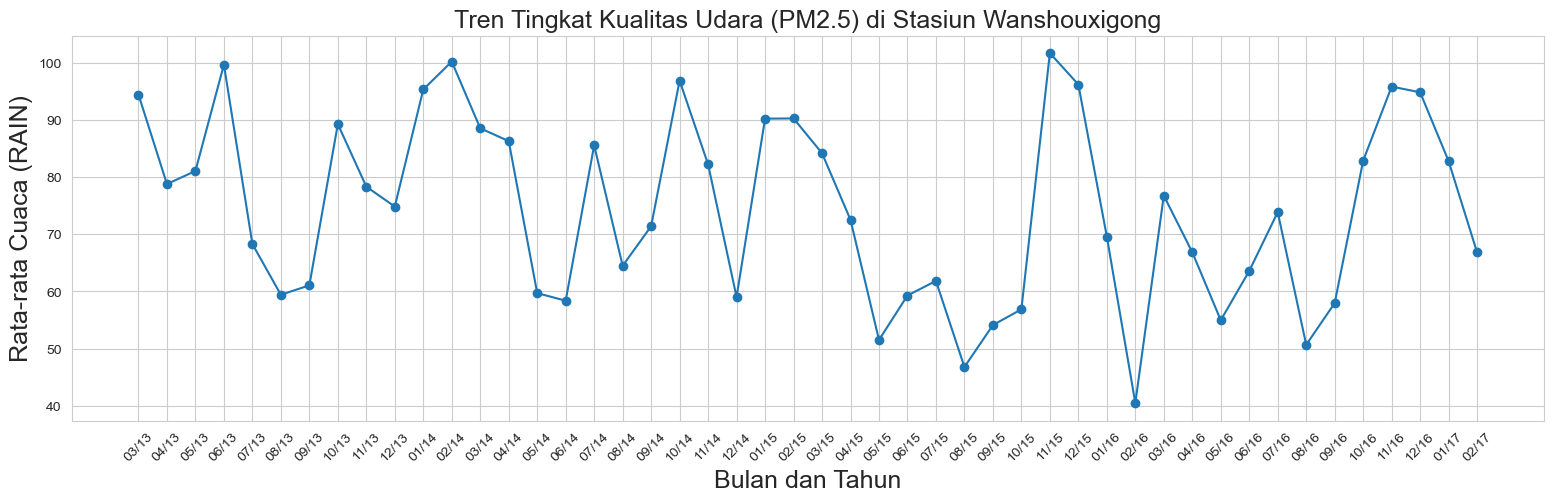

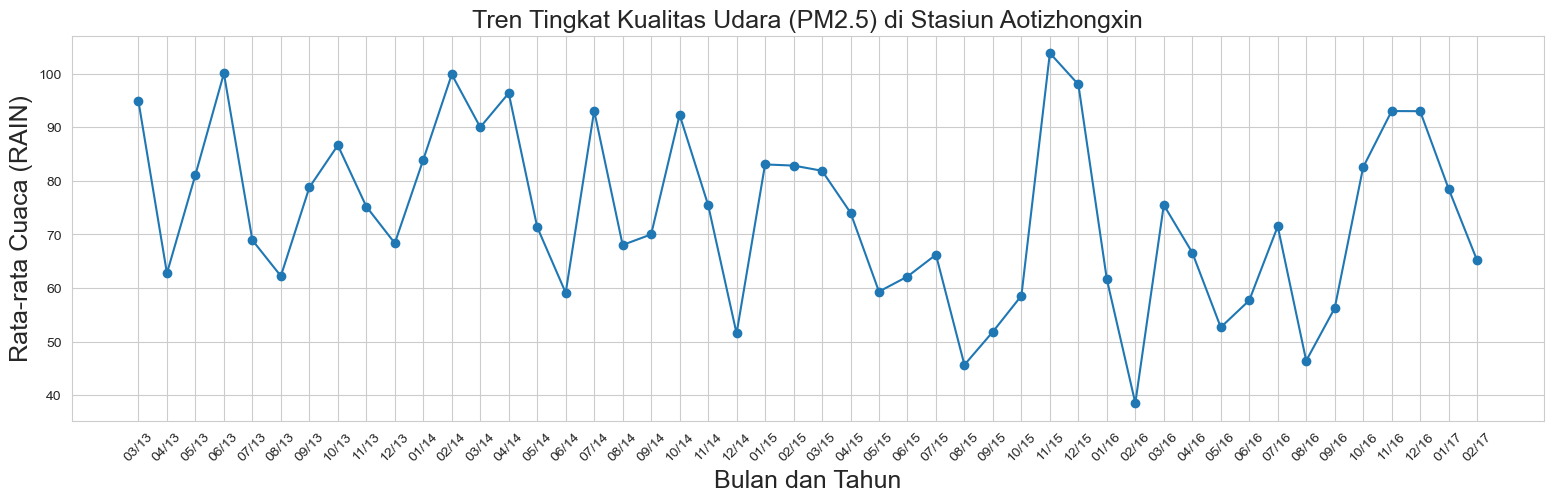

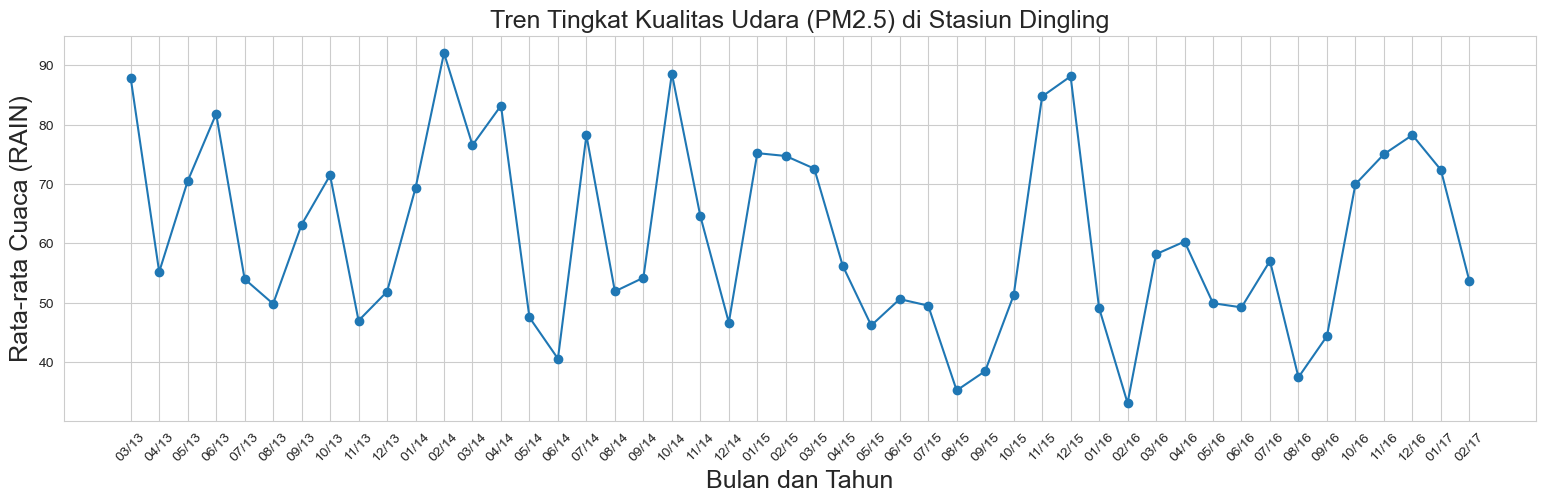

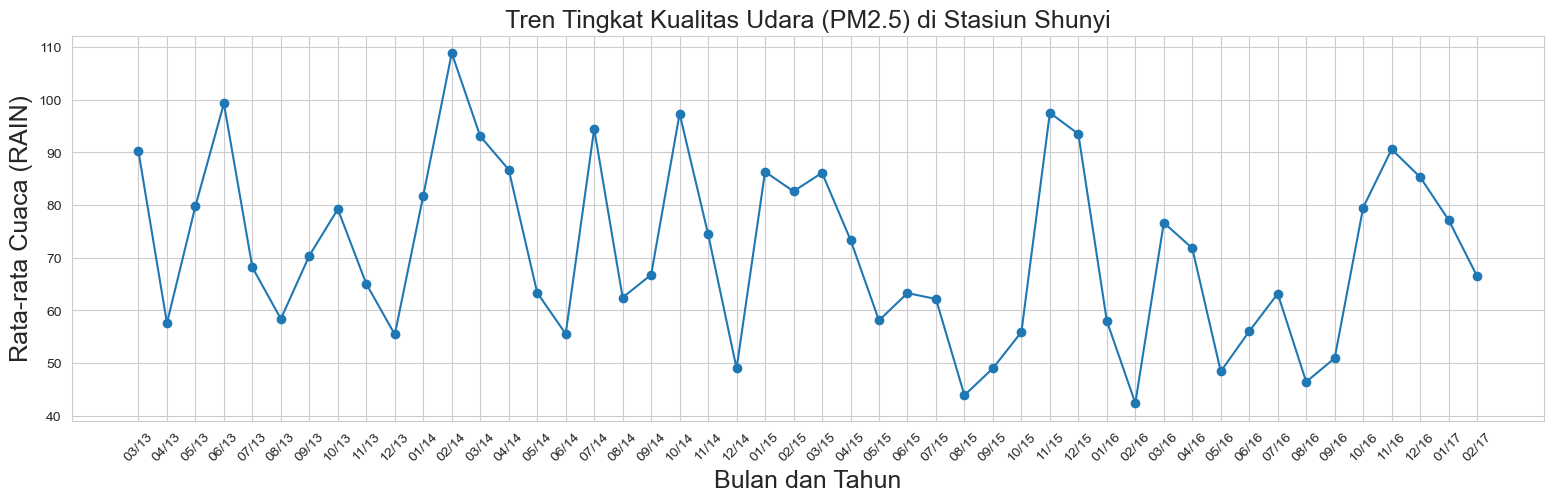

In [345]:
station_list = combined_df['station'].unique()

# Membuat subplot untuk setiap stasiun
for station in station_list:
    # Filter data untuk stasiun tertentu
    station_data = combined_df[combined_df['station'] == station]
    
    # Mengelompokkan data berdasarkan bulan dan menghitung rata-rata cuaca (RAIN) untuk setiap bulan
    monthly_rain_avg = station_data.groupby(station_data['datetime'].dt.to_period("M"))['PM2.5'].mean()
    
    # Mengubah indeks ke format yang diinginkan
    monthly_rain_avg.index = monthly_rain_avg.index.strftime('%m/%y')
    
    # Membuat grafik pergerakan rata-rata cuaca (RAIN) untuk stasiun ini
    plt.figure(figsize=(19, 5))
    plt.plot(monthly_rain_avg.index, monthly_rain_avg.values, marker='o', linestyle='-')
    plt.title(f'Tren Tingkat Kualitas Udara (PM2.5) di Stasiun {station}',fontsize=18)
    plt.xlabel('Bulan dan Tahun', fontsize=18)
    plt.ylabel('Rata-rata Cuaca (RAIN)',fontsize=18)
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Menampilkan plot untuk stasiun ini
    plt.show()

### Pertanyaan 2: Bagaimana tren curah hujan bulanan di setiap station

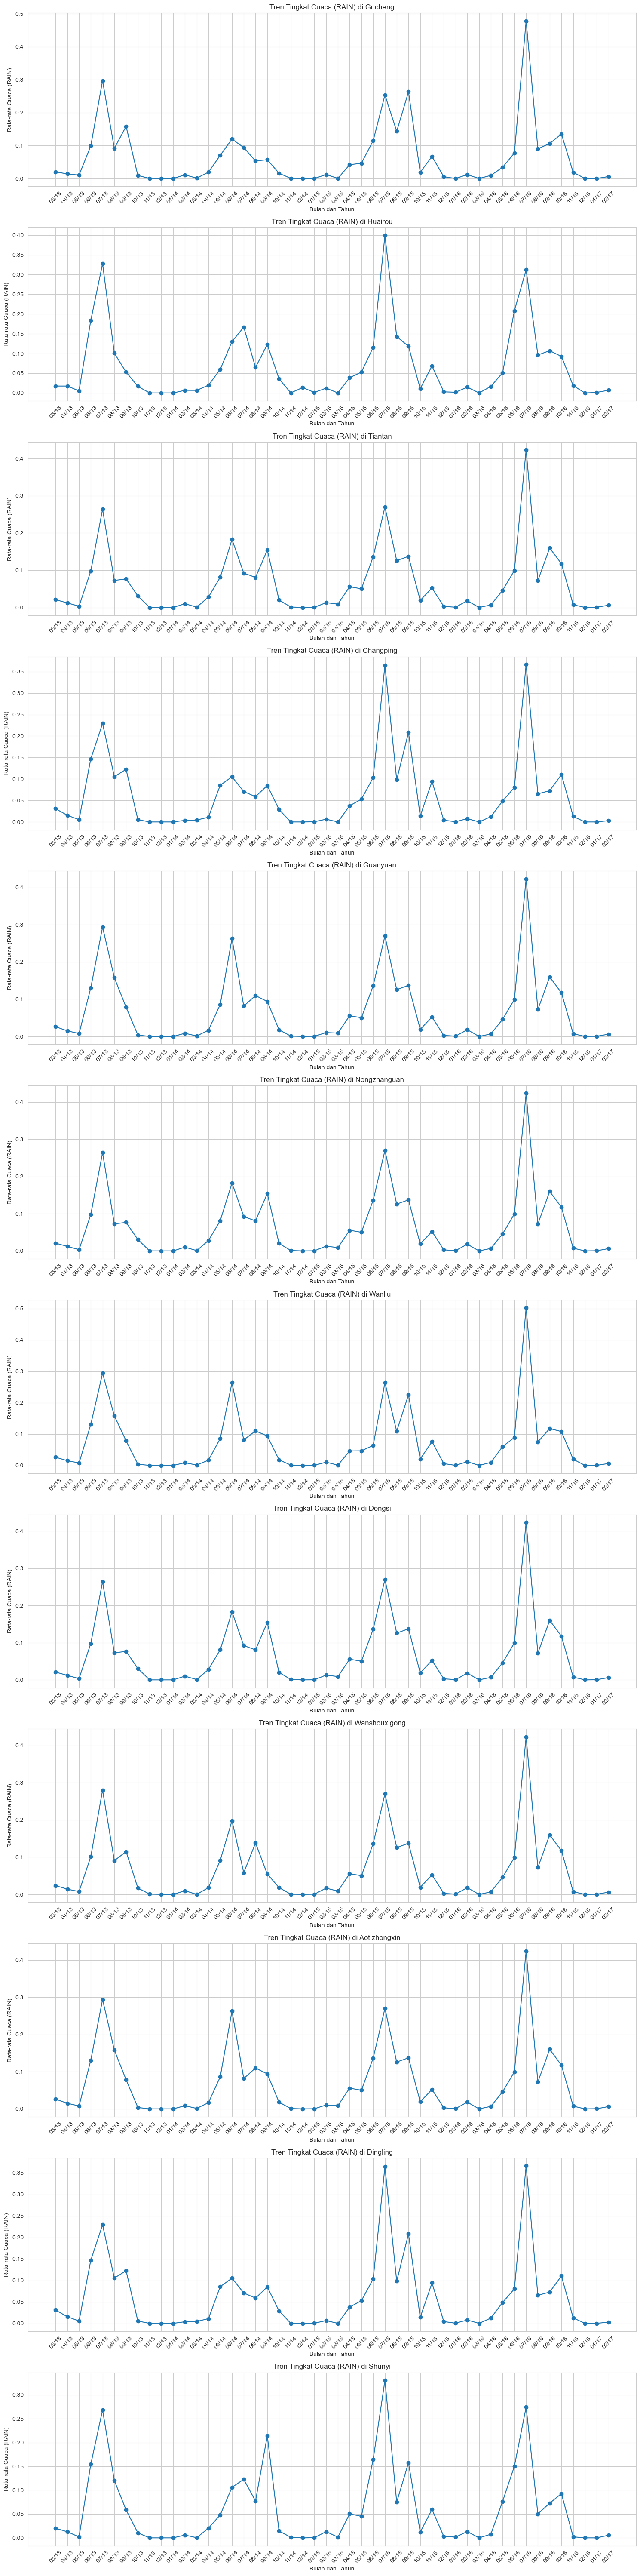

In [361]:
station_list2 = combined_df['station'].unique()

# Membuat subplot untuk setiap stasiun
plt.figure(figsize=(15, 5 * len(station_list2)))

for i, station in enumerate(station_list2):
    # Filter data untuk stasiun tertentu
    station_data2 = combined_df[combined_df['station'] == station]
    
    # Mengelompokkan data berdasarkan bulan dan menghitung rata-rata cuaca (RAIN) untuk setiap bulan
    monthly_rain_avg = station_data2.groupby(station_data2['datetime'].dt.to_period("M"))['RAIN'].mean()
    
    # Mengubah indeks ke format yang diinginkan
    monthly_rain_avg.index = monthly_rain_avg.index.strftime('%m/%y')
    
    # Membuat subplot untuk stasiun ini
    plt.subplot(len(station_list), 1, i + 1)  # 1 kolom subplot
    plt.plot(monthly_rain_avg.index, monthly_rain_avg.values, marker='o', linestyle='-')
    plt.title(f'Tren Tingkat Cuaca (RAIN) di {station}')
    plt.xlabel('Bulan dan Tahun')
    plt.ylabel('Rata-rata Cuaca (RAIN)')
    plt.xticks(rotation=45)
    plt.grid(True)

# Mengatur layout keseluruhan dan menampilkan plot
plt.tight_layout()
plt.show()

# Analisis Lanjutan

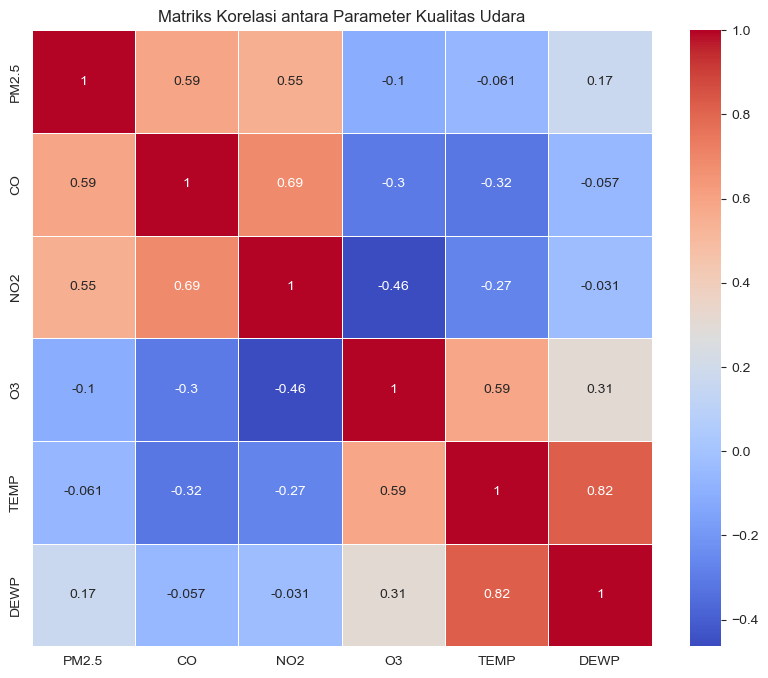

In [362]:
#Analisis Lanjutan Korelasi

columns_to_correlate = ['PM2.5', 'CO', 'NO2', 'O3','TEMP','DEWP']

# Buat matriks korelasi
correlation_matrix = combined_df[columns_to_correlate].corr()

# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi antara Parameter Kualitas Udara')
plt.show()

In [347]:
combined_df.to_csv("data_combined.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : dari tren pergerakan PM2.5 dapat disimpulkan jika tren bulanan PM2.5 tinggi masyarakat disarankan untuk memakai masker setiap beraktivitas keluar rumah
- conclution pertanyaan 2 : dari tren pergerakan curah hujan (RAIN) dapat disimpulkan jika tren bulanan curah hujan tinggi masyarakat diharapkan dapat menyiapkan peralatan hujan jika keluar rumah